In [1]:
import sys
sys.path.append('..')

from PIL import Image, ImageDraw
import torchvision.transforms.functional as TF

from allometry.const import DATA_DIR
from allometry.allometry_sheet import AllometrySheet
from allometry.characters import CHARS

In [2]:
SHEET_DIR = DATA_DIR / 'allometry_sheets'

# SHEET = SHEET_DIR / 'Fish_Linear_Allometry'
# SHEET = SHEET / '00006.tif'
# THETA = 270.0

SHEET = SHEET_DIR / 'Biomass_Fish_Families_FamilyProgram'
SHEET = SHEET / '00004.tif'
THETA = 90.0

### Examine dissection boxes

In [3]:
sheet = AllometrySheet(SHEET, rotate=THETA)

In [4]:
dissect = sheet.binary.convert('RGB')

draw = ImageDraw.Draw(dissect)

In [5]:
for i in range(len(sheet)):
    _, box = sheet[i]
    draw.rectangle(box, outline=(0, 255, 255))

In [6]:
path = DATA_DIR / 'dissect.jpg'
dissect.save(path, 'JPEG')
# display(dissect)

### Examine the crop boxes

4073


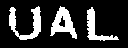

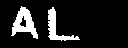

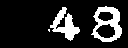

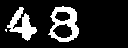

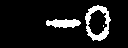

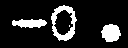

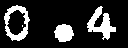

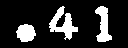

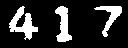

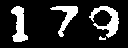

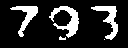

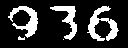

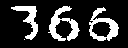

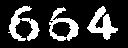

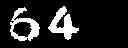

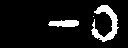

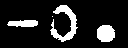

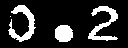

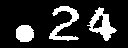

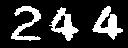

In [16]:
print(len(sheet.chars))

start = 250
end = start + 20

for i in range(start, end):
    data, box = sheet[i]
    image = TF.to_pil_image(data)
    display(image)

In [8]:
# for i in range(len(sheet)):
#     image, box = sheet.char_image(i)
#     rebuilt.paste(image, (box.left, box.top))

In [9]:
# path = DATA_DIR / 'rebuilt.jpg'
# rebuilt.save(path, 'JPEG')
# display(rebuilt)

In [10]:
# path = DATA_DIR / 'ransom.jpg'
# ransom.save(path, 'JPEG')
# # display(ransom)